In [1]:
install.packages(c("tidyverse", "lubridate", "skimr", "janitor", "rfm"))

# Notwendige Pakete laden
library(tidyverse)    # für Datenmanipulation und Visualisierung
library(lubridate)    # für Datumsfunktionen
library(skimr)        # für schnellen Datenüberblick
library(janitor)      # zur Säuberung der Spaltennamen
library(knitr)        # für die Erstellung von Tabellen
library(rfm)          # für RFM-Analyse
library(dplyr)        # für Datenmanipulation
library(tidyr)        # für Datenumformung
library(purrr)        # für funktionale Programmierung


Installiere Pakete nach 'C:/Users/Nutzer/AppData/Local/R/win-library/4.4'
(da 'lib' nicht spezifiziert)



Paket 'tidyverse' erfolgreich ausgepackt und MD5 Summen abgeglichen
Paket 'lubridate' erfolgreich ausgepackt und MD5 Summen abgeglichen


Warning message:
"kann alte Installation von Paket 'lubridate' nicht entfernen"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\Users\Nutzer\AppData\Local\R\win-library\4.4\00LOCK\lubridate\libs\x64\lubridate.dll nach C:\Users\Nutzer\AppData\Local\R\win-library\4.4\lubridate\libs\x64\lubridate.dll zu kopieren: Permission denied"
Warning message:
"'lubridate' wiederhergestellt"


Paket 'skimr' erfolgreich ausgepackt und MD5 Summen abgeglichen
Paket 'janitor' erfolgreich ausgepackt und MD5 Summen abgeglichen
Paket 'rfm' erfolgreich ausgepackt und MD5 Summen abgeglichen

Die heruntergeladenen Binärpakete sind in 
	C:\Users\Nutzer\AppData\Local\Temp\RtmpAtazss\downloaded_packages


Warning message:
"Paket 'tidyverse' wurde unter R Version 4.4.3 erstellt"
Warning message:
"Paket 'tidyr' wurde unter R Version 4.4.3 erstellt"
Warning message:
"Paket 'readr' wurde unter R Version 4.4.3 erstellt"
Warning message:
"Paket 'dplyr' wurde unter R Version 4.4.3 erstellt"
Warning message:
"Paket 'forcats' wurde unter R Version 4.4.3 erstellt"
Warning message:
"Paket 'lubridate' wurde unter R Version 4.4.3 erstellt"
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
"Paket 'skimr' wurde unter R 

In [ ]:
# CSV-Datei einlesen
df <- read_csv("../synthetic_beverage_sales_data.csv") %>%
  clean_names()

ERROR: Error: 'synthetic_beverage_sales_data.csv' does not exist in current working directory ('c:/Users/Nutzer/OneDrive - Hochschule Luzern/Master/3. Semester/TSM_MarkFor/Report/Dateien von Träger Sven TA.MSE_T_H24.2401 - MARKFOR/Code/R_code').


In [91]:
head(df, 4) # print first 4 rows of data frame

glimpse(df) # print summary of data frame

order_id,customer_id,customer_type,product,category,unit_price,quantity,discount,total_price,region,order_date
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<date>
ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23
ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23
ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23
ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23


Rows: 8,999,910
Columns: 11
$ order_id      <chr> "ORD1", "ORD1", "ORD1", "ORD1", "ORD1", "ORD2", "ORD3", …
$ customer_id   <chr> "CUS1496", "CUS1496", "CUS1496", "CUS1496", "CUS1496", "…
$ customer_type <chr> "B2B", "B2B", "B2B", "B2B", "B2B", "B2C", "B2B", "B2B", …
$ product       <chr> "Vio Wasser", "Evian", "Sprite", "Rauch Multivitamin", "…
$ category      <chr> "Water", "Water", "Soft Drinks", "Juices", "Water", "Alc…
$ unit_price    <dbl> 1.66, 1.56, 1.17, 3.22, 0.87, 9.09, 2.14, 0.43, 1.21, 1.…
$ quantity      <dbl> 53, 90, 73, 59, 35, 2, 44, 13, 92, 3, 11, 8, 16, 3, 43, …
$ discount      <dbl> 0.10, 0.10, 0.05, 0.10, 0.10, 0.00, 0.10, 0.05, 0.10, 0.…
$ total_price   <dbl> 79.18, 126.36, 81.14, 170.98, 27.40, 18.18, 84.74, 5.31,…
$ region        <chr> "Baden-Württemberg", "Baden-Württemberg", "Baden-Württem…
$ order_date    <date> 2023-08-23, 2023-08-23, 2023-08-23, 2023-08-23, 2023-08…


# Data preperation

In [92]:
df[df == ""] <- NA # Ersetze leere Strings ("") durch NA
colSums(is.na(df)) # Zeigt dir, wie viele NAs pro Spalte vorhanden sind


order_id   customer_id customer_type       product      category 
            0             0             0             0             0 
   unit_price      quantity      discount   total_price        region 
            0             0             0             0             0 
   order_date 
            0

In [93]:
# Doppelte Einträge prüfen
# sum(duplicated(df))
# das dauert länger als 30min, deswegen abgebrochen

In [94]:
# Count rows with invalid or implausible values in key numeric columns
df %>%
  filter(
    unit_price <= 0 |         # Unit price should be greater than 0
    quantity <= 0 |           # Quantity should be greater than 0
    discount < 0 | discount > 1 |  # Discount must be between 0 and 1
    total_price < 0           # Total price should not be negative
  ) %>%
  nrow()  # Count the number of rows that meet any of the above conditions


[1] 0

# Splitting into B2B and B2C

In [ ]:
# Aufteilen in B2B und B2C
# Hier ist jede Zeile ein Kauf eines Kunden von einem Produkt (Stückzahl egal), der Kunde kann also mehrere Produkte pro Tag gekauft haben, es sind aber alles verschiedene Zeilen
# Wir nennen das line-item level, weil es eine Zeile pro Produkt ist

df_b2b <- df %>% filter(customer_type == "B2B")
df_b2c <- df %>% filter(customer_type == "B2C")

# Aggregate data to one row per order per customer 

# Für RFM, übergibt nur customer_id, order_date und revenue
# For B2B customers
rfm_base_b2b <- df_b2b %>%
  group_by(customer_id, order_date) %>%                  # Group by customer and order date 
  summarise(revenue = sum(total_price, na.rm = TRUE),    # Sum total revenue per order (in case multiple products were ordered)
  .groups = "drop"
)
# For B2C customers
rfm_base_b2c <- df_b2c %>%
  group_by(customer_id, order_date) %>%                  # Same logic for B2C customers
  summarise(revenue = sum(total_price, na.rm = TRUE),
  .groups = "drop"
)

In [132]:
# due to multiple products ordered per customer per day we group orders by date and customer to understand the actual order
# wir nennen es order-level oder invoice-level, weil es eine Zeile pro Rechnung ist (Tag+Kunde)

# 1. Aggregate all numeric values per invoice (per customer & order_date)
orders_b2b <- df_b2b %>%
  group_by(customer_id, order_date) %>%
  summarise(
    quantity = sum(quantity, na.rm = TRUE),
    discount = mean(discount, na.rm = TRUE),     # average discount per invoice
    unit_price     = mean(unit_price, na.rm = TRUE),   # average unit price per invoice
    total_price    = sum(total_price, na.rm = TRUE),   # total invoice value
    .groups = "drop"
  )

# 2. Turn columns into list for stat calc
summary_b2b <- orders_b2b %>%
  summarise(
    discount        = list(discount),
    quantity        = list(quantity),
    total_price     = list(total_price),
    unit_price      = list(unit_price)
  ) %>%
  pivot_longer(everything(), names_to = "variable", values_to = "values") %>%
  mutate(
    count  = map_int(values, ~length(.x)),
    mean   = map_dbl(values, ~mean(.x, na.rm = TRUE)),
    sd     = map_dbl(values, ~sd(.x, na.rm = TRUE)),
    min    = map_dbl(values, ~min(.x, na.rm = TRUE)),
    q25    = map_dbl(values, ~quantile(.x, 0.25, na.rm = TRUE)),
    median = map_dbl(values, ~median(.x, na.rm = TRUE)),
    q75    = map_dbl(values, ~quantile(.x, 0.75, na.rm = TRUE)),
    max    = map_dbl(values, ~max(.x, na.rm = TRUE))
  ) %>%
  select(variable, count, mean, sd, min, q25, median, q75, max)


# analog für b2c
orders_b2c <- df_b2c %>%
  group_by(customer_id, order_date) %>%
  summarise(
    quantity = sum(quantity, na.rm = TRUE),
    discount = mean(discount, na.rm = TRUE),     # average discount per invoice
    unit_price     = mean(unit_price, na.rm = TRUE),   # average unit price per invoice
    total_price    = sum(total_price, na.rm = TRUE),   # total invoice value
    .groups = "drop"
  )

# 2. Turn columns into list for stat calc
summary_b2c <- orders_b2c %>%
  summarise(
    discount        = list(discount),
    quantity        = list(quantity),
    total_price     = list(total_price),
    unit_price      = list(unit_price)
  ) %>%
  pivot_longer(everything(), names_to = "variable", values_to = "values") %>%
  mutate(
    count  = map_int(values, ~length(.x)),
    mean   = map_dbl(values, ~mean(.x, na.rm = TRUE)),
    sd     = map_dbl(values, ~sd(.x, na.rm = TRUE)),
    min    = map_dbl(values, ~min(.x, na.rm = TRUE)),
    q25    = map_dbl(values, ~quantile(.x, 0.25, na.rm = TRUE)),
    median = map_dbl(values, ~median(.x, na.rm = TRUE)),
    q75    = map_dbl(values, ~quantile(.x, 0.75, na.rm = TRUE)),
    max    = map_dbl(values, ~max(.x, na.rm = TRUE))
  ) %>%
  select(variable, count, mean, sd, min, q25, median, q75, max)


# 3. Show result as table
kable(summary_b2b, caption = "Summary statistics of B2B orders (aggregated per invoice)", digits = 2)
kable(summary_b2c, caption = "Summary statistics of B2C orders (aggregated per invoice)", digits = 2)



Table: Summary statistics of B2B orders (aggregated per invoice)

|variable    |  count|   mean|      sd|  min|    q25| median|    q75|      max|
|:-----------|------:|------:|-------:|----:|------:|------:|------:|--------:|
|discount    | 935300|   0.08|    0.02| 0.05|   0.07|   0.08|   0.10|     0.15|
|quantity    | 935300| 173.08|  110.04| 1.00|  89.00| 159.00| 237.00|  1166.00|
|total_price | 935300| 963.99| 1582.90| 0.30| 161.36| 365.37| 945.58| 23490.22|
|unit_price  | 935300|   5.63|    8.55| 0.32|   1.55|   2.30|   6.12|   154.50|



Table: Summary statistics of B2C orders (aggregated per invoice)

|variable    |   count|   mean|     sd|  min|   q25| median|    q75|     max|
|:-----------|-------:|------:|------:|----:|-----:|------:|------:|-------:|
|discount    | 1689025|   0.00|   0.00| 0.00|  0.00|   0.00|   0.00|    0.00|
|quantity    | 1689025|  27.45|  17.22| 1.00| 14.00|  25.00|  38.00|  199.00|
|total_price | 1689025| 162.85| 277.79| 0.46| 27.51|  59.74| 142.02| 4067.90|
|unit_price  | 1689025|   5.92|   9.94| 0.46|  1.57|   2.24|   4.81|  112.46|

In [131]:
# Das ist die Statistik über alle Zeilen (also Produktkäufe), nicht nur über die aggregierten Rechnungen
# also line-item level

# Deskriptive Statistik für B2B
summary_b2b <- df_b2b %>%
  summarise(
    discount        = list(discount),
    quantity        = list(quantity),
    total_price     = list(total_price),
    unit_price      = list(unit_price)
  ) %>%
  pivot_longer(everything(), names_to = "variable", values_to = "values") %>%
  mutate(
    count  = map_int(values, ~length(.x)),
    mean   = map_dbl(values, ~mean(.x, na.rm = TRUE)),
    sd     = map_dbl(values, ~sd(.x, na.rm = TRUE)),
    min    = map_dbl(values, ~min(.x, na.rm = TRUE)),
    q25    = map_dbl(values, ~quantile(.x, 0.25, na.rm = TRUE)),
    median = map_dbl(values, ~median(.x, na.rm = TRUE)),
    q75    = map_dbl(values, ~quantile(.x, 0.75, na.rm = TRUE)),
    max    = map_dbl(values, ~max(.x, na.rm = TRUE))
  ) %>%
  select(variable, count, mean, sd, min, q25, median, q75, max)

# Ausgabe
kable(summary_b2b, caption = "Product-wise summary statistics of b2b numeric variables", digits = 2)

# Deskriptive Statistik für B2C
summary_b2c <- df_b2c %>%
  summarise(
    discount        = list(discount),
    quantity        = list(quantity),
    total_price     = list(total_price),
    unit_price      = list(unit_price)
  ) %>%
  pivot_longer(everything(), names_to = "variable", values_to = "values") %>%
  mutate(
    count  = map_int(values, ~length(.x)),
    mean   = map_dbl(values, ~mean(.x, na.rm = TRUE)),
    sd     = map_dbl(values, ~sd(.x, na.rm = TRUE)),
    min    = map_dbl(values, ~min(.x, na.rm = TRUE)),
    q25    = map_dbl(values, ~quantile(.x, 0.25, na.rm = TRUE)),
    median = map_dbl(values, ~median(.x, na.rm = TRUE)),
    q75    = map_dbl(values, ~quantile(.x, 0.75, na.rm = TRUE)),
    max    = map_dbl(values, ~max(.x, na.rm = TRUE))
  ) %>%
  select(variable, count, mean, sd, min, q25, median, q75, max)

# Ausgabe
kable(summary_b2c, caption = "Product-wise summary statistics of b2c numeric variables", digits = 2)




Table: Product-wise summary statistics of b2b numeric variables

|variable    |   count|   mean|     sd|  min|   q25| median|    q75|      max|
|:-----------|-------:|------:|------:|----:|-----:|------:|------:|--------:|
|discount    | 3204505|   0.08|   0.03| 0.05|  0.05|   0.10|   0.10|     0.15|
|quantity    | 3204505|  50.52|  28.87| 1.00| 26.00|  51.00|  76.00|   100.00|
|total_price | 3204505| 281.36| 810.75| 0.30| 31.35|  77.20| 167.58| 14295.30|
|unit_price  | 3204505|   5.63|  13.21| 0.32|  1.03|   1.81|   3.04|   169.53|



Table: Product-wise summary statistics of b2c numeric variables

|variable    |   count|  mean|     sd|  min|  q25| median|   q75|     max|
|:-----------|-------:|-----:|------:|----:|----:|------:|-----:|-------:|
|discount    | 5795405|  0.00|   0.00| 0.00| 0.00|   0.00|  0.00|    0.00|
|quantity    | 5795405|  8.00|   4.32| 1.00| 4.00|   8.00| 12.00|   15.00|
|total_price | 5795405| 47.46| 143.17| 0.46| 6.20|  13.02| 26.28| 1686.90|
|unit_price  | 5795405|  5.92|  15.46| 0.46| 1.07|   1.75|  3.21|  112.46|

AB HIER WEITERMACHEN!!

In [123]:
analysis_date <- as.Date("2023-12-31")  # beliebig wählbar

rfm_result_b2b <- rfm_table_order(
  data = rfm_base_b2b,
  customer_id = customer_id,
  order_date = order_date,
  revenue = revenue,
  analysis_date = analysis_date
)

rfm_result_b2c <- rfm_table_order(
  data = rfm_base_b2c,
  customer_id = customer_id,
  order_date = order_date,
  revenue = revenue,
  analysis_date = analysis_date
)


In [125]:
# Beispiel für B2C – analog für B2B möglich
rfm_segmented_b2c <- rfm_result_b2c$rfm %>%
  mutate(
    segment = case_when(
      recency_score >= 4 & frequency_score >= 4 & monetary_score >= 4 ~ "Champions",
      recency_score >= 2 & frequency_score >= 3 & monetary_score >= 3 ~ "Loyal Customers",
      recency_score >= 3 & frequency_score >= 1 & frequency_score <= 3 & monetary_score <= 3 ~ "Potential Loyalist",
      recency_score >= 4 & frequency_score <= 1 & monetary_score <= 1 ~ "New Customers",
      recency_score >= 3 & recency_score <= 4 & frequency_score <= 1 & monetary_score <= 1 ~ "Promising",
      recency_score >= 2 & recency_score <= 3 & frequency_score >= 2 & frequency_score <= 3 & monetary_score >= 2 & monetary_score <= 3 ~ "Need Attention",
      recency_score >= 2 & recency_score <= 3 & frequency_score <= 2 & monetary_score <= 2 ~ "About To Sleep",
      recency_score <= 2 & frequency_score >= 2 & monetary_score >= 2 ~ "At Risk",
      recency_score <= 1 & frequency_score >= 4 & monetary_score >= 4 ~ "Can’t Lose Them",
      recency_score >= 1 & recency_score <= 2 & frequency_score >= 1 & frequency_score <= 2 & monetary_score >= 1 & monetary_score <= 2 ~ "Hibernating",
      recency_score <= 2 & frequency_score <= 2 & monetary_score <= 2 ~ "Lost",
      TRUE ~ "Uncategorized"
    )
  )


In [126]:
total_customers <- nrow(rfm_segmented_b2c)

all_segments <- c(
  "Champions", "Loyal Customers", "Potential Loyalist", "New Customers",
  "Promising", "Need Attention", "About To Sleep", "At Risk",
  "Can’t Lose Them", "Hibernating", "Lost", "Uncategorized"
)

segment_analysis_b2c <- rfm_segmented_b2c %>%
  group_by(segment) %>%
  summarise(
    no_customers = n(),
    avg_amount = round(mean(amount, na.rm = TRUE), 2),
    avg_transactions = round(mean(transaction_count, na.rm = TRUE), 2),
    avg_recency_days = round(mean(recency_days, na.rm = TRUE), 1),
    .groups = "drop"
  ) %>%
  mutate(
    total_customers = total_customers,
    percentage = round(100 * no_customers / total_customers, 1)
  ) %>%
  right_join(tibble(segment = all_segments), by = "segment") %>%
  replace_na(list(
    no_customers = 0, avg_amount = 0, avg_transactions = 0,
    avg_recency_days = 0, percentage = 0, total_customers = total_customers
  )) %>%
  arrange(factor(segment, levels = all_segments))

kable(segment_analysis_b2c, caption = "Analyse der RFM-Segmente – B2C (vollständig)")




Table: Analyse der RFM-Segmente – B2C (vollständig)

|segment            | no_customers| avg_amount| avg_transactions| avg_recency_days| total_customers| percentage|
|:------------------|------------:|----------:|----------------:|----------------:|---------------:|----------:|
|Champions          |          652|   48376.31|           277.98|              1.4|            6437|       10.1|
|Loyal Customers    |         1589|   45834.36|           271.18|              3.3|            6437|       24.7|
|Potential Loyalist |         1646|   38665.34|           251.68|              2.2|            6437|       25.6|
|New Customers      |            0|       0.00|             0.00|              0.0|            6437|        0.0|
|Promising          |            0|       0.00|             0.00|              0.0|            6437|        0.0|
|Need Attention     |          127|   40608.60|           258.06|              5.4|            6437|        2.0|
|About To Sleep     |          187|   363

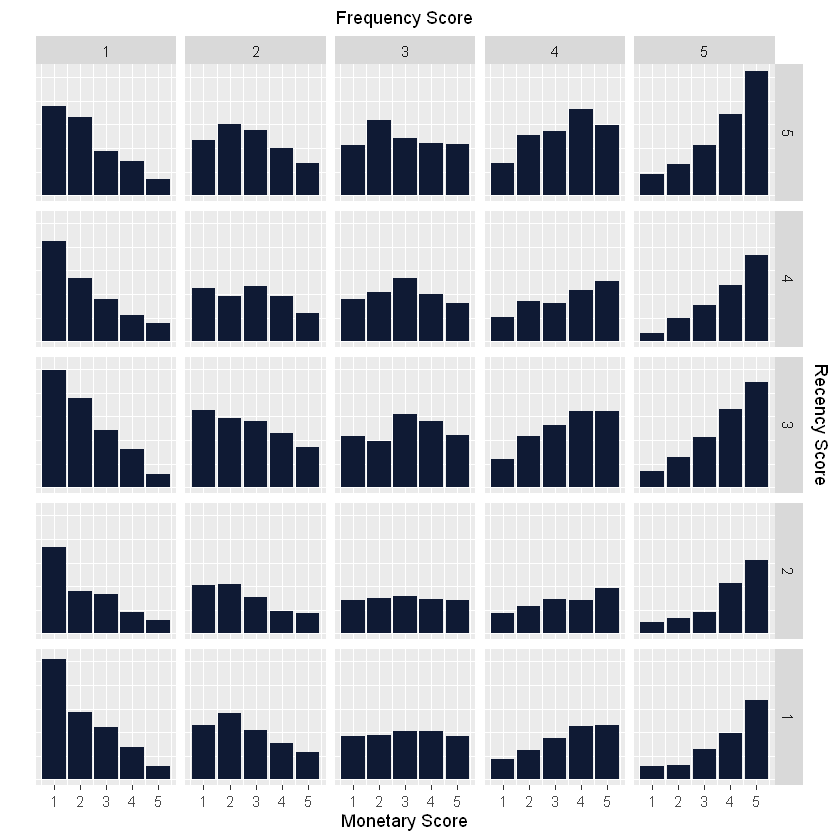

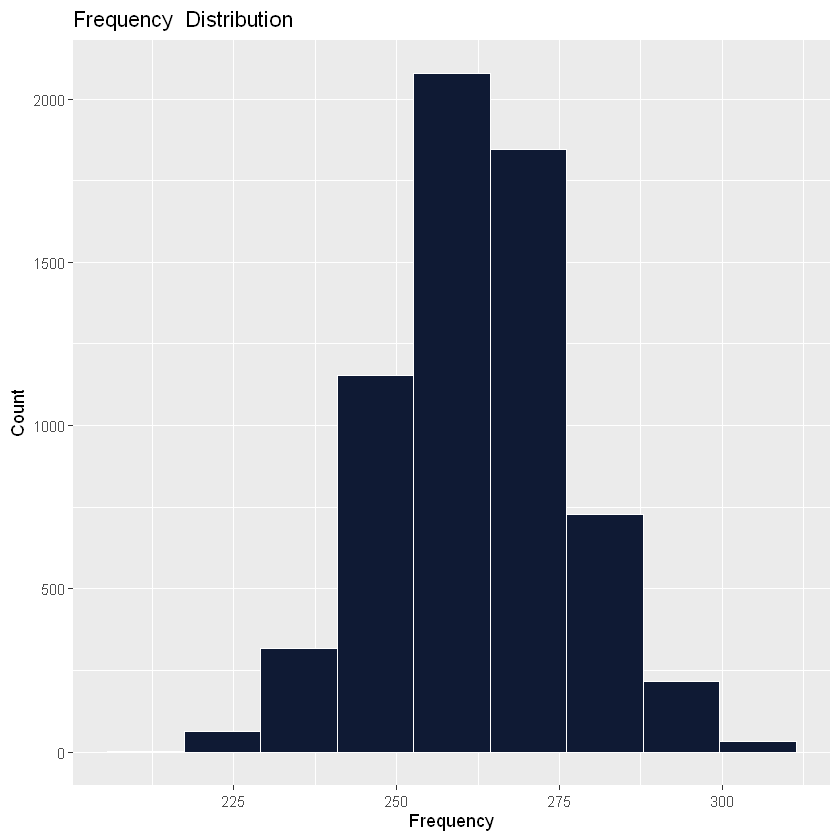

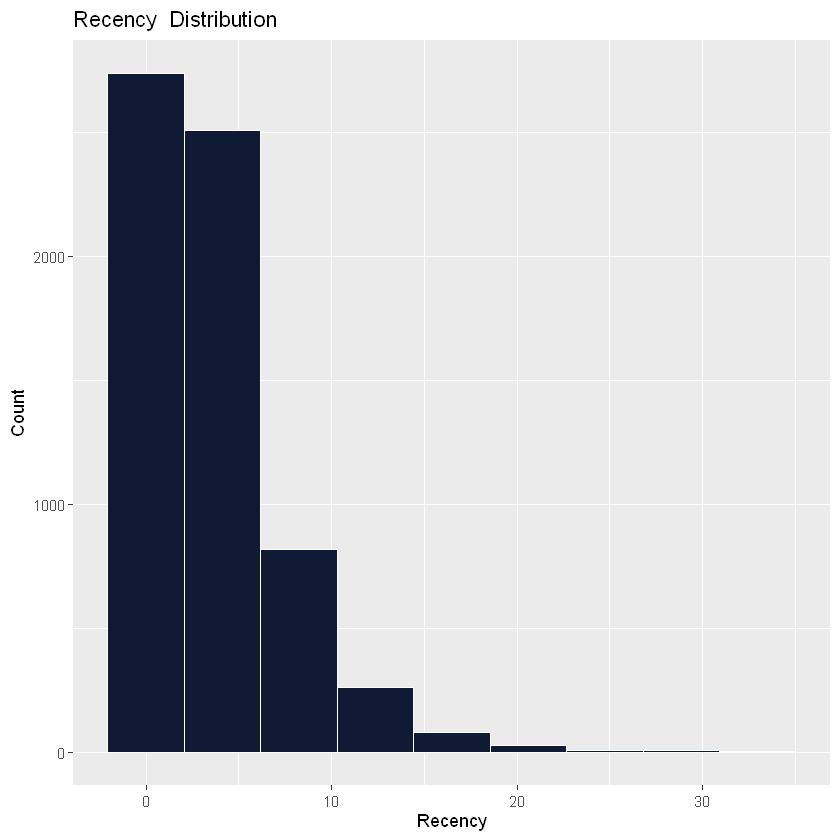

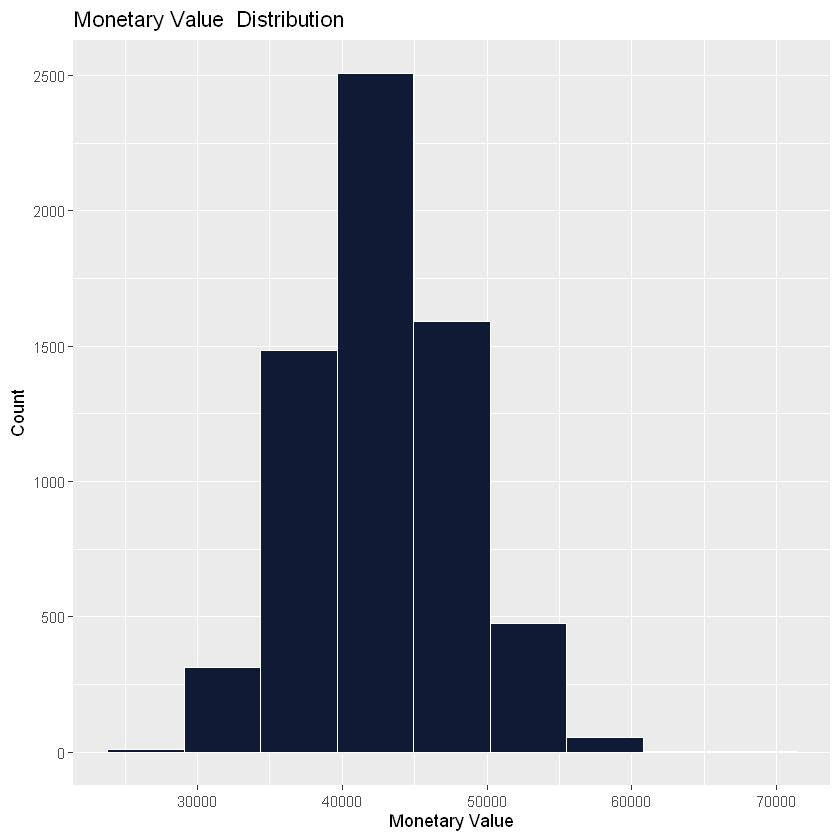

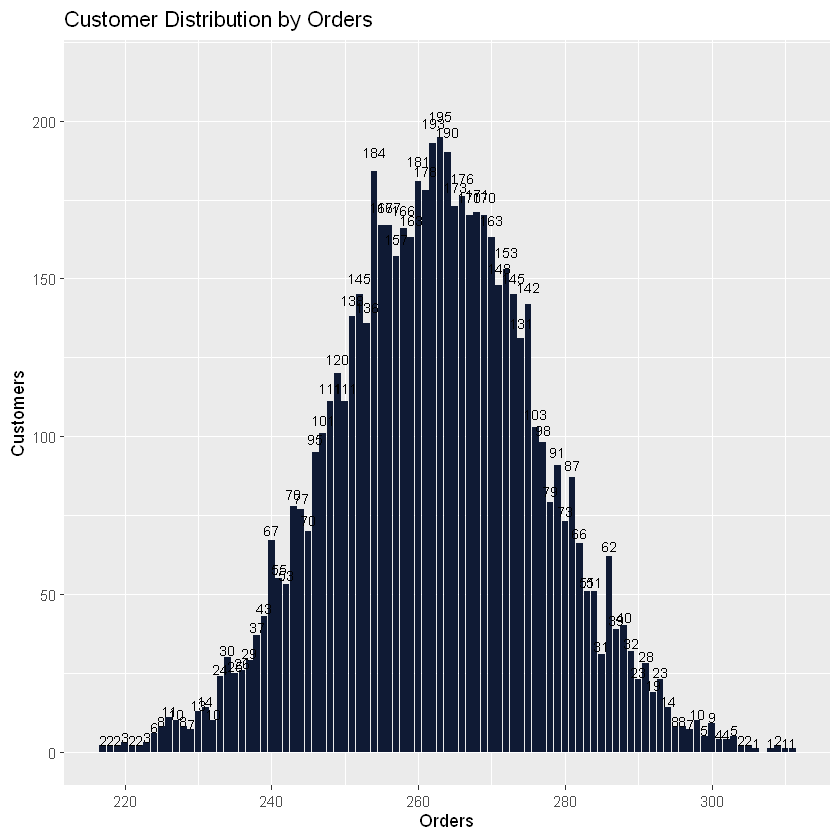

ERROR: Error in rfm_plot_scatter(rfm_result_b2c): konnte Funktion "rfm_plot_scatter" nicht finden


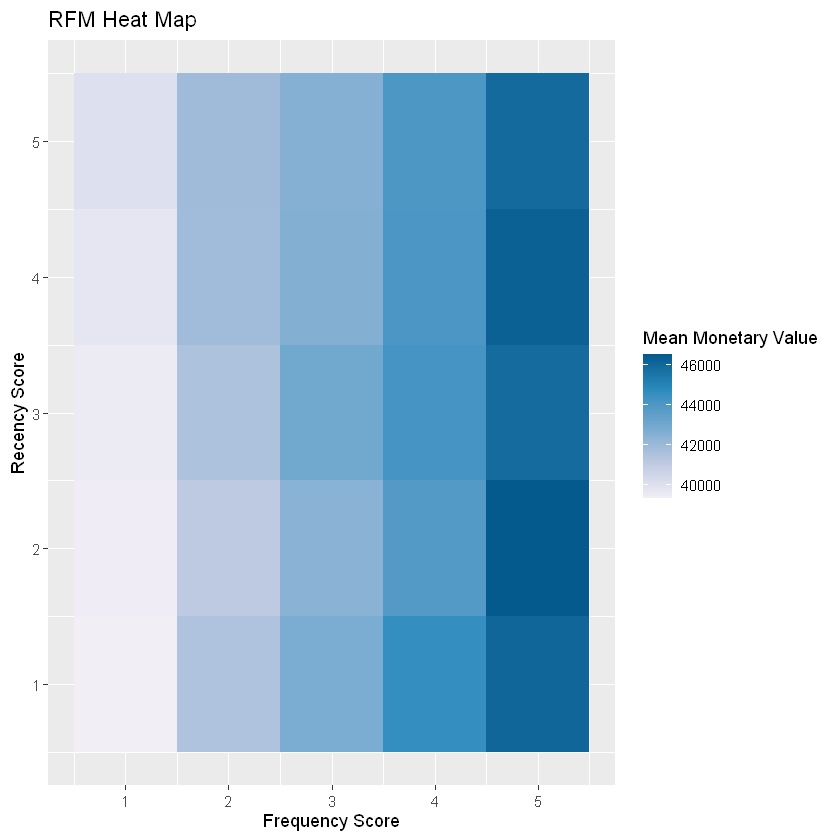

In [102]:
# Verteilungen & Heatmaps
rfm_plot_bar_chart(rfm_result_b2c)
rfm_plot_histogram(rfm_result_b2c, metric = "frequency")
rfm_plot_histogram(rfm_result_b2c, metric = "recency")
rfm_plot_histogram(rfm_result_b2c, metric = "monetary")
rfm_plot_order_dist(rfm_result_b2c)
rfm_plot_heatmap(rfm_result_b2c)
rfm_plot_scatter(rfm_result_b2c)
